In [127]:
import pandas as pd
import numpy as np
import io
import scipy as sp
import scipy.fftpack
import scipy.io as sio
import matplotlib
import matplotlib.pyplot as plt

In [128]:
%%html
<style>
table {display: block; align: left;}
</style>

## Load DNS Data

In [129]:
chanDNSReT = {
    "ReT_180" : 178.12,
    "ReT_395" : 392.24,
    "ReT_590" : 587.19,
    "ReT_1000" : 1000.512,
    "ReT_2000" : 1994.756,
    "ReT_5200" : 5185.897   
}

chanDNSMeans = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_means.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_means.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_means.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_means.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_means.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_means.txt"    
}

chanDNSReys = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_rey.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_rey.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_rey.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_rey.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_rey.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_rey.txt"    
}

chanDNSk = {
    "ReT_180" : "../data/ReTau_180/processed/chan180_k.txt",
    "ReT_395" : "../data/ReTau_395/processed/chan395_k.txt",
    "ReT_590" : "../data/ReTau_590/processed/chan590_k.txt",
    "ReT_1000" : "../data/ReTau_1000/processed/chan1000_k.txt",
    "ReT_2000" : "../data/ReTau_2000/processed/chan2000_k.txt",
    "ReT_5200" : "../data/ReTau_5200/processed/chan5200_k.txt"    
}


chanMeans = {}
chanReys = {}
chanK = {}

for key in chanDNSMeans:
    chanMeans[key] = pd.read_csv(chanDNSMeans[key], delim_whitespace=True)
    chanReys[key] = pd.read_csv(chanDNSReys[key], delim_whitespace=True)
    chanK[key] = pd.read_csv(chanDNSk[key], delim_whitespace=True)
    

## Load RANS Data

In [130]:
chanRESsst = {
    "ReT_395" : "./paraview_output_time74_395_nate_sst.csv",   
}

chanSimSST = {}

for key in chanRESsst:
    chanSimSST[key] = pd.read_csv(chanRESsst[key])

#for key in chanSimSST['ReT_395']:
    #print(key)

## Load IDDES Data

In [132]:
chanRESiddes = {}
chanRESiddes["ReT_395"] = {
 "aU_1" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_fixed/results/profiles.dat",
 "aU_0p5" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0p5/results/profiles.dat",
 "aU_0" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0/results/profiles.dat",
 "aU_0_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0_withfixes/results/profiles.dat", 
 "aU_1_fixes" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_1_withfixes/results/profiles.dat",
 "aU_0_fixes_prodlim" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_sigma_0_withfixes_newprodlim2/results/profiles.dat",
 "aU_0_fixes_nm" : "/nscratch/ndeveld/iddes-nalu/run/chan395_ar2_iso70/results/new.dat",
 "aU_0_fixes_lup" : "/nscratch/ndeveld/iddes-nalu/run/chan395_coarse_lessupw/results/profiles.dat"
}

chanSimIDDES = {}
chanSimIDDES["ReT_395"] = {}

for key in chanRESiddes["ReT_395"]:
    chanSimIDDES["ReT_395"][key] = pd.read_csv(chanRESiddes["ReT_395"][key])


In [134]:
chanSimIDDES["ReT_395"]["aU_0_fixes_nm"]

,x,z,y,u,v,w,nut,k
0,4.0,0.000000,1.5,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
1,4.0,0.001500,1.5,0.585203,-0.001185,1.651513e-06,1.511608e-09,0.000152
2,4.0,0.003310,1.5,1.289960,-0.002621,1.179022e-05,8.008935e-08,0.001961
3,4.0,0.005478,1.5,2.131032,-0.004350,3.491071e-05,1.286605e-06,0.011384
4,4.0,0.008058,1.5,3.123033,-0.006418,6.983810e-05,1.064920e-05,0.043431
5,4.0,0.011113,1.5,4.267361,-0.008844,1.013396e-04,5.526542e-05,0.125083
6,4.0,0.014714,1.5,5.531331,-0.011579,1.336862e-04,1.917679e-04,0.280017
7,4.0,0.018939,1.5,6.845635,-0.014512,1.947529e-04,4.601436e-04,0.489705
8,4.0,0.023881,1.5,8.138273,-0.017554,2.682264e-04,8.382140e-04,0.697271
9,4.0,0.029641,1.5,9.359076,-0.020652,3.475033e-04,1.292568e-03,0.854347


## Plot DNS Data For All $Re_{\tau}$

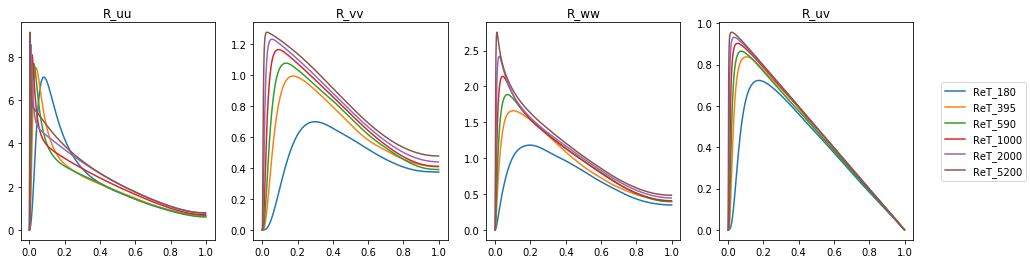

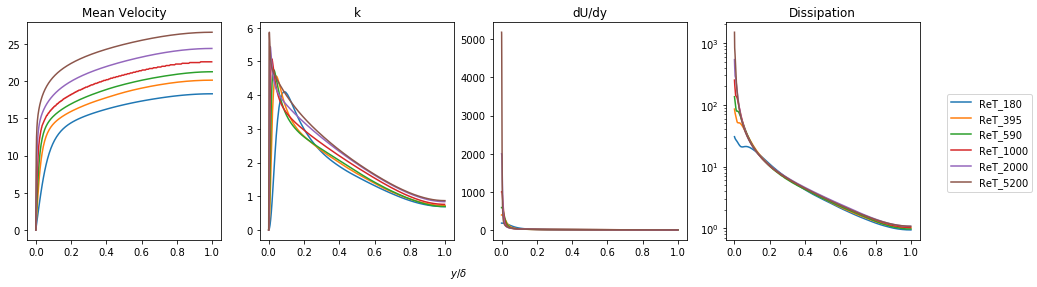

In [135]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4),sharex=True)


for key in chanReys:
    ax1.plot(chanReys[key]['y'],chanReys[key]['R_uu'])
    ax1.set_title("R_uu")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['R_vv'])
    ax2.set_title("R_vv")
    #ax2.set_xscale('log')
    
    ax3.plot(chanReys[key]['y'],chanReys[key]['R_ww'])
    ax3.set_title("R_ww")
    #ax3.set_xscale('log')
    
    ax4.plot(chanReys[key]['y'],-1*chanReys[key]['R_uv'])
    ax4.set_title("R_uv")
    #ax4.set_xscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()


fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4),sharex=True)

for key in chanMeans:
    ax1.plot(chanMeans[key]['y'],chanMeans[key]['Umean'])
    ax1.set_title("Mean Velocity")
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k'])
    ax2.set_title("k")
    #ax2.set_xscale('log')
    
    ax3.plot(chanMeans[key]['y'],chanMeans[key]['dUmean/dy'])
    ax3.set_title("dU/dy")
    #ax3.set_yscale('log')
    
    ax4.plot(chanK[key]['y'],chanK[key]['dissip']*chanDNSReT[key])
    ax4.set_title("Dissipation")
    ax4.set_yscale('log')
    
handles, labels = ax4.get_legend_handles_labels()
labels = chanMeans.keys()
fig.legend(handles, labels, loc='center right')
fig.text(0.5, 0.0, r'$y/\delta$', ha='center')
plt.show()

## Length Scale and Time Scale

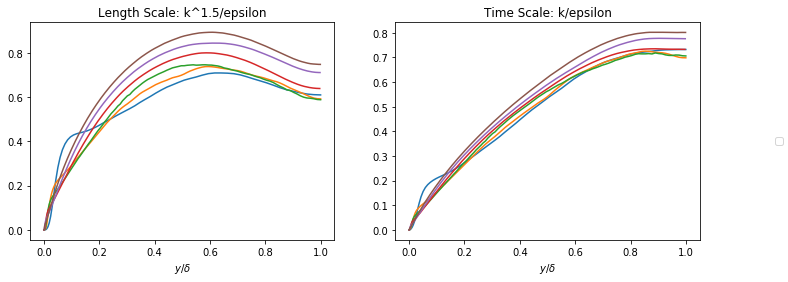

In [136]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(12,4))

for key in chanMeans:
    ax1.plot(chanReys[key]['y'],(chanReys[key]['k']**1.5)/(chanK[key]['dissip']*chanDNSReT[key]))
    ax1.set_title("Length Scale: k^1.5/epsilon")
    ax1.set_xlabel(r'$y/ \delta$')
    #ax1.set_xscale('log')
    
    ax2.plot(chanReys[key]['y'],chanReys[key]['k']/(chanK[key]['dissip']*chanDNSReT[key]))
    ax2.set_title("Time Scale: k/epsilon")
    ax2.set_xlabel(r'$y/ \delta$')
    #ax2.set_xscale('log')

handles, labels = ax2.get_legend_handles_labels()
labels = chanReys.keys()
fig.legend(handles, labels, loc='center right')

plt.show()

## Results

### ReT=395 Channel Flow

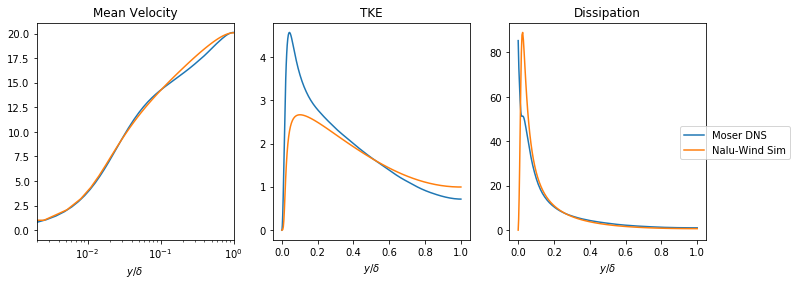

In [137]:
ret = 'ReT_395'
reNu = 1.0/chanDNSReT["ReT_395"]

dns395U = chanMeans[ret]['Umean']
dns395k = chanReys[ret]['k']
dns395yr = chanReys[ret]['y']
dns395y = chanMeans[ret]['y']
dns395dis = chanK[ret]['dissip']*chanDNSReT[ret]

sim395y = chanSimSST[ret]['Points:1']
sim395yp = sim395y/reNu
sim395U = chanSimSST[ret]['velocity_:0']
sim395k = chanSimSST[ret]['turbulent_ke']
sim395dis = 0.09*chanSimSST[ret]['turbulent_ke']*chanSimSST[ret]['specific_dissipation_rate']

fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,4))

ax1.plot(dns395y,dns395U, label="Moser DNS")
ax1.plot(sim395y,sim395U, label="Nalu-Wind Sim")
ax1.set_title("Mean Velocity")
ax1.set_xlabel(r'$y/ \delta$')
ax1.set_xscale('log')
ax1.set_xlim([0.002,1])

ax2.plot(dns395yr,dns395k, label="Moser DNS")
ax2.plot(sim395y,sim395k, label="Nalu-Wind Sim")
ax2.set_title("TKE")
ax2.set_xlabel(r'$y/ \delta$')

ax3.plot(dns395y,dns395dis, label="Moser DNS")
ax3.plot(sim395y,sim395dis, label="Nalu-Wind Sim")
ax3.set_title("Dissipation")
ax3.set_xlabel(r'$y/ \delta$')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc='center right')
plt.show()


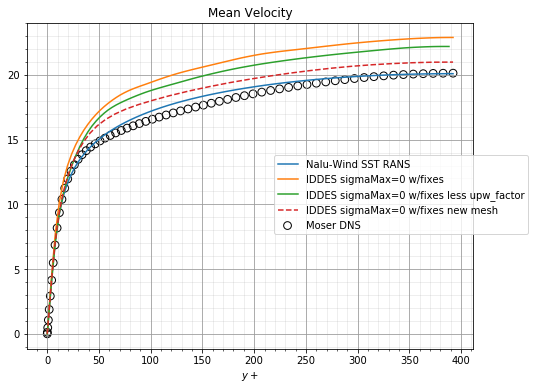

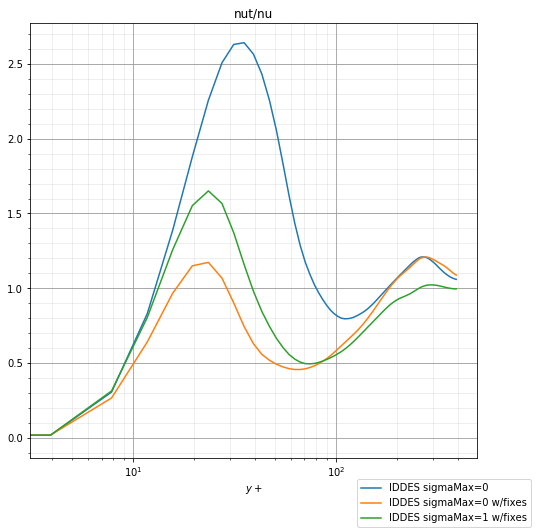

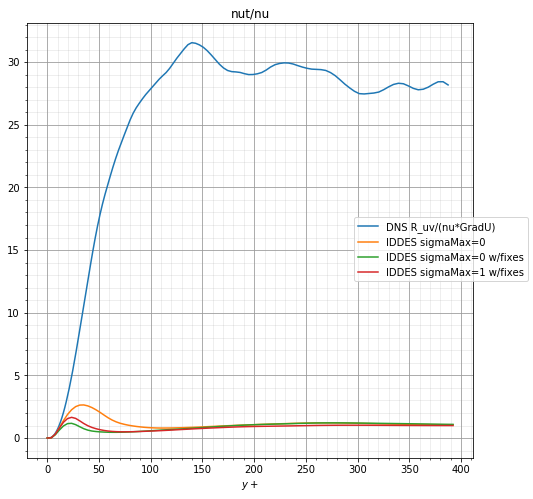

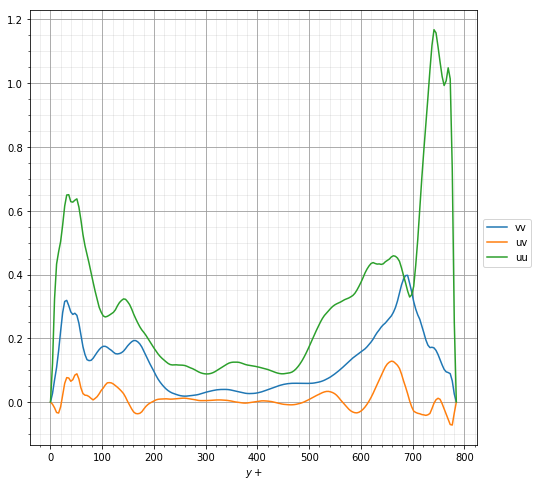

In [138]:
ret = 'ReT_395'

reNu = 1.0/chanDNSReT["ReT_395"]

#### Load DNS Data ####
dns395U = chanMeans[ret]['Umean']
dns395k = chanReys[ret]['k']
dns395yr = chanReys[ret]['y']
dns395uv = -chanReys[ret]['R_uv']
dns395dudy = chanMeans[ret]['dUmean/dy']
dns395y = chanMeans[ret]['y']
dns395yp = chanMeans[ret]['y+']
dns395dis = chanK[ret]['dissip']*chanDNSReT[ret]
dns395nut = dns395uv/dns395dudy

#### Limit results to half channel ####
res_x_4 = ((chanSimIDDES["ReT_395"]['aU_1']['x'] == 4.0) & (chanSimIDDES["ReT_395"]['aU_1']['z'] <= 1.0))
res_x_4_nm = ((chanSimIDDES["ReT_395"]['aU_0_fixes_nm']['x'] == 4.0) & (chanSimIDDES["ReT_395"]['aU_0_fixes_nm']['z'] <= 1.0))
res_x_4_lu = ((chanSimIDDES["ReT_395"]['aU_0_fixes_lup']['x'] == 4.0) & (chanSimIDDES["ReT_395"]['aU_0_fixes_lup']['z'] <= 1.0))

iddes395y = {}
iddes395yp = {}
iddes395y2 = {}
iddes395yp2 = {}
iddes395U = {}
iddes395k = {}
iddes395nut = {}
iddes395vv = {}
iddes395uv = {}
iddes395uu = {}

#print(chanSimIDDES["ReT_395"]["aU_0_fixes_nm"]['u'][res_x_4_nm])

for key in chanSimIDDES["ReT_395"]:
    if "nm" in key:
        iddes395y[key] = chanSimIDDES["ReT_395"][key]['z'][res_x_4_nm]
        iddes395yp[key] = iddes395y[key]/reNu
        iddes395y2[key] = chanSimIDDES["ReT_395"][key]['z']
        iddes395yp2[key] = iddes395y2[key]/reNu
        iddes395U[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4_nm]
        iddes395k[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4_nm]
        if 'nut' in chanSimIDDES["ReT_395"][key].keys():
            iddes395nut[key] = chanSimIDDES["ReT_395"][key]['nut'][res_x_4_nm]
        if 'vv' in chanSimIDDES["ReT_395"][key].keys():
            iddes395vv[key] = chanSimIDDES["ReT_395"][key]['vv']
            iddes395uv[key] = chanSimIDDES["ReT_395"][key]['uv']
            iddes395uu[key] = chanSimIDDES["ReT_395"][key]['uu']
    elif "lup" in key:
        iddes395y[key] = chanSimIDDES["ReT_395"][key]['z'][res_x_4_lu]
        iddes395yp[key] = iddes395y[key]/reNu
        iddes395y2[key] = chanSimIDDES["ReT_395"][key]['z']
        iddes395yp2[key] = iddes395y2[key]/reNu
        iddes395U[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4_lu]
        iddes395k[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4_lu]
        if 'nut' in chanSimIDDES["ReT_395"][key].keys():
            iddes395nut[key] = chanSimIDDES["ReT_395"][key]['nut'][res_x_4_lu]
        if 'vv' in chanSimIDDES["ReT_395"][key].keys():
            iddes395vv[key] = chanSimIDDES["ReT_395"][key]['vv']
            iddes395uv[key] = chanSimIDDES["ReT_395"][key]['uv']
            iddes395uu[key] = chanSimIDDES["ReT_395"][key]['uu']
    else:
        iddes395y[key] = chanSimIDDES["ReT_395"][key]['z'][res_x_4]
        iddes395yp[key] = iddes395y[key]/reNu
        iddes395y2[key] = chanSimIDDES["ReT_395"][key]['z']
        iddes395yp2[key] = iddes395y2[key]/reNu
        iddes395U[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4]
        iddes395k[key] = chanSimIDDES["ReT_395"][key]['u'][res_x_4]
        if 'nut' in chanSimIDDES["ReT_395"][key].keys():
            iddes395nut[key] = chanSimIDDES["ReT_395"][key]['nut'][res_x_4]
        if 'vv' in chanSimIDDES["ReT_395"][key].keys():
            iddes395vv[key] = chanSimIDDES["ReT_395"][key]['vv']
            iddes395uv[key] = chanSimIDDES["ReT_395"][key]['uv']
            iddes395uu[key] = chanSimIDDES["ReT_395"][key]['uu'] 

simLabel = ["IDDES sigmaMax=1",
            "IDDES sigmaMax=0.5",
            "IDDES sigmaMax=0",
            "IDDES sigmaMax=0 w/fixes",
            "IDDES sigmaMax=1 w/fixes",
            "IDDES sigmaMax=0 w/fixes prodlim",
            "IDDES sigmaMax=0 w/fixes new mesh",
            "IDDES sigmaMax=0 w/fixes less upw_factor"]

fig, (ax1) = plt.subplots(1,1,figsize=(8,6))

n=2

#print(iddes395U["aU_0_fixes_nm"])

#ax1.plot(dns395yp,dns395U, label="Moser DNS")
ax1.scatter(dns395yp[::n], dns395U[::n], s=60, facecolors='none', edgecolors='k', label="Moser DNS")
ax1.plot(sim395yp,sim395U, label="Nalu-Wind SST RANS")
#ax1.plot(iddes395yp["aU_0p5"],iddes395U["aU_0p5"], label=simLabel[1])
#ax1.plot(iddes395yp["aU_0"],iddes395U["aU_0"], label=simLabel[2])
#ax1.plot(iddes395yp["aU_1"],iddes395U["aU_1"], label=simLabel[0])
ax1.plot(iddes395yp["aU_0_fixes"],iddes395U["aU_0_fixes"], label=simLabel[3])
ax1.plot(iddes395yp["aU_0_fixes_lup"],iddes395U["aU_0_fixes_lup"], label=simLabel[7])
#ax1.plot(iddes395yp["aU_1_fixes"],iddes395U["aU_1_fixes"], label=simLabel[4])
#ax1.plot(iddes395yp["aU_0_fixes_prodlim"],iddes395U["aU_0_fixes_prodlim"], label=simLabel[5])
ax1.plot(iddes395yp["aU_0_fixes_nm"],iddes395U["aU_0_fixes_nm"], label=simLabel[6],linestyle="--")
ax1.set_title("Mean Velocity")
ax1.set_xlabel(r'$y+$')
#ax1.set_xlim([0,100])
#ax1.set_xlabel(r'$y/ \delta$')
#ax1.set_yscale('log')
#ax1.set_xscale('log')
handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


fig, (ax1) = plt.subplots(1,1,figsize=(8,8))

ax1.plot(iddes395yp["aU_0"],iddes395nut["aU_0"]/reNu, label=simLabel[2])
ax1.plot(iddes395yp["aU_0_fixes"],iddes395nut["aU_0_fixes"]/reNu, label=simLabel[3])
ax1.plot(iddes395yp["aU_1_fixes"],iddes395nut["aU_1_fixes"]/reNu, label=simLabel[4])
ax1.set_xlabel(r'$y+$')

ax1.set_title("nut/nu")
ax1.set_xscale('log')

handles, labels = ax1.get_legend_handles_labels()
fig.legend(handles, labels, loc="lower right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()

fig, (ax2) = plt.subplots(1,1,figsize=(8,8))

ax2.plot(dns395yp,dns395nut/reNu, label="DNS R_uv/(nu*GradU)")
ax2.plot(iddes395yp["aU_0"],iddes395nut["aU_0"]/reNu, label=simLabel[2])
ax2.plot(iddes395yp["aU_0_fixes"],iddes395nut["aU_0_fixes"]/reNu, label=simLabel[3])
ax2.plot(iddes395yp["aU_1_fixes"],iddes395nut["aU_1_fixes"]/reNu, label=simLabel[4])
ax2.set_xlabel(r'$y+$')
ax2.set_title("nut/nu")
#ax2.set_xscale('log')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


fig, (ax2) = plt.subplots(1,1,figsize=(8,8))

#ax2.plot(dns395yp,dns395nut/reNu, label="DNS R_uv/(nu*GradU)")
ax2.plot(iddes395yp2["aU_0_fixes_prodlim"],iddes395vv["aU_0_fixes_prodlim"], label="vv")
ax2.plot(iddes395yp2["aU_0_fixes_prodlim"],iddes395uv["aU_0_fixes_prodlim"], label="uv")
ax2.plot(iddes395yp2["aU_0_fixes_prodlim"],iddes395uu["aU_0_fixes_prodlim"], label="uu")
ax2.set_xlabel(r'$y+$')
#ax2.set_title("nut/nu")
#ax2.set_xscale('log')

handles, labels = ax2.get_legend_handles_labels()
fig.legend(handles, labels, loc="center right")
plt.grid(b=True, which='major', color='#999999', linestyle='-')
plt.minorticks_on()
plt.grid(b=True, which='minor', color='#999999', linestyle='-', alpha=0.2)
plt.show()


#### 